# Mask Generation with OpenCV
In the paper they generate irregular masks by using occlusion/dis-occlusion between two consecutive frames of videos, as described in [this paper](https://lmb.informatik.uni-freiburg.de/Publications/2010/Bro10e/sundaram_eccv10.pdf). 

Instead we'll simply be using OpenCV to generate some irregular masks, which will hopefully perform just as well. We've implemented this in the function `_generate_mask`, which is located in the `util.py` file in the libs directory

In [1]:
import os
import itertools
import matplotlib
import matplotlib.pyplot as plt

# Import function that generates random masks
from libs.util import MaskGenerator

%matplotlib inline

Let us review of the code of this function

In [2]:
??MaskGenerator._generate_mask

Signature: MaskGenerator._generate_mask(self)
Source:   
    def _generate_mask(self):
        """Generates a random irregular mask with lines, circles and elipses"""

        img = np.zeros((self.height, self.width, self.channels), np.uint8)

        # Set size scale
        size = int((self.width + self.height) * 0.03)
        if self.width < 64 or self.height < 64:
            raise Exception("Width and Height of mask must be at least 64!")
        
        # Draw random lines
        for _ in range(randint(1, 20)):
            x1, x2 = randint(1, self.width), randint(1, self.width)
            y1, y2 = randint(1, self.height), randint(1, self.height)
            thickness = randint(3, size)
            cv2.line(img,(x1,y1),(x2,y2),(1,1,1),thickness)
            
        # Draw random circles
        for _ in range(randint(1, 20)):
            x1, y1 = randint(1, self.width), randint(1, self.height)
            radius = randint(3, size)
            cv2.circle(img,(x1,y1),radius,(1,1

Let's create some output samples with this function to see what it does

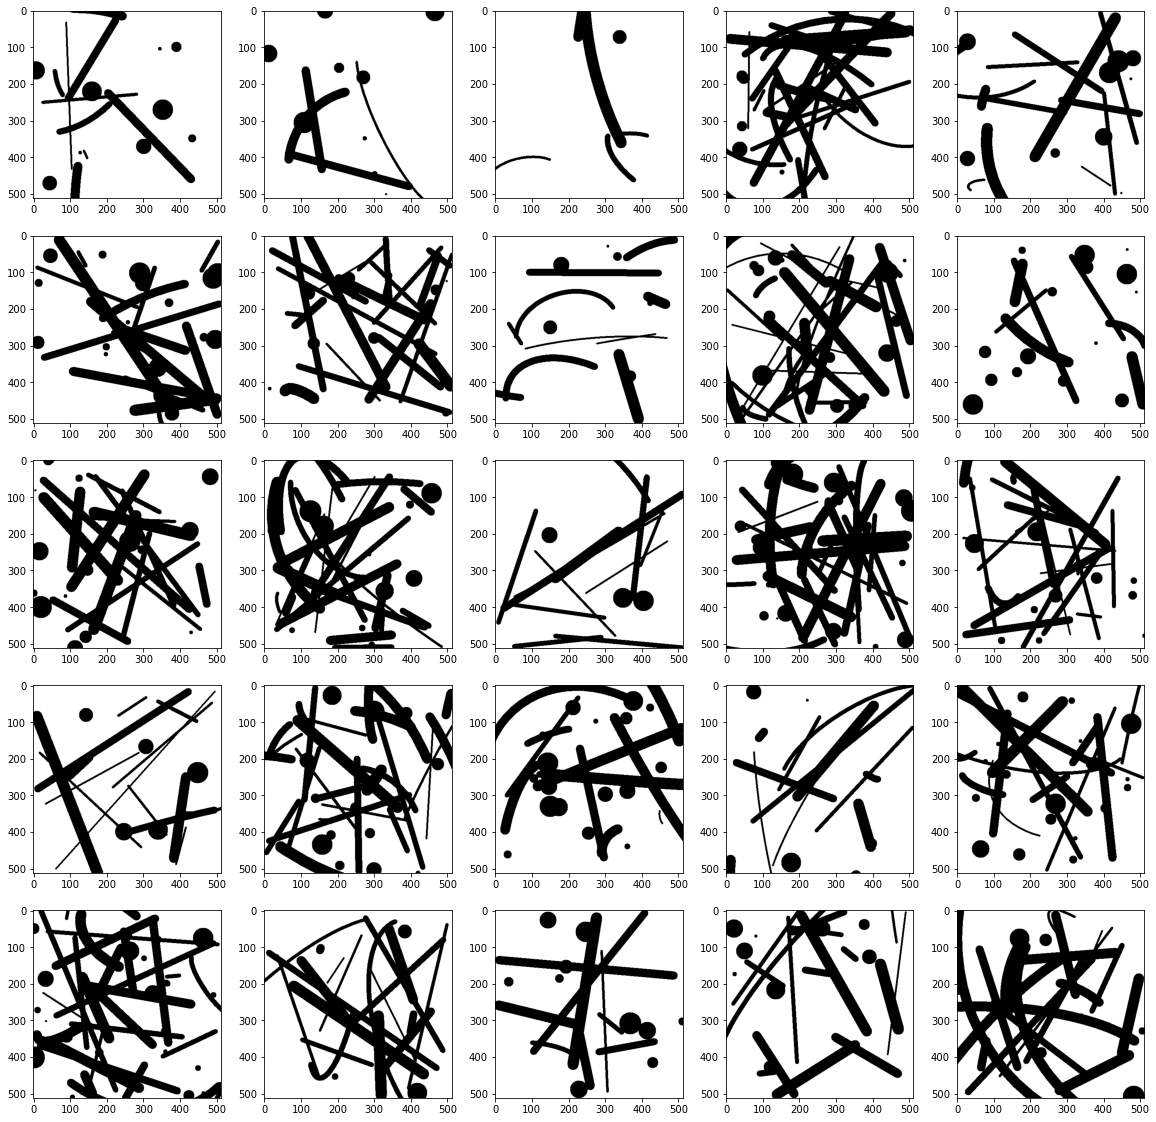

In [3]:
# Instantiate mask generator
mask_generator = MaskGenerator(512, 512, 3, rand_seed=42)

# Plot the results
_, axes = plt.subplots(5, 5, figsize=(20, 20))
axes = list(itertools.chain.from_iterable(axes))

for i in range(len(axes)):
    
    # Generate image
    img = mask_generator.sample()
    
    # Plot image on axis
    axes[i].imshow(img*255)

I've also implemented a function which will load masks from a directory, and potentially augments them. This can be used to load masks published with the original paper. E.g. get the original training and testing masks from http://masc.cs.gmu.edu/wiki/partialconv, and save them to `data/masks/train/` and `data/masks/test/`, respectively.

>> Found 55116 masks in ./data/masks/train


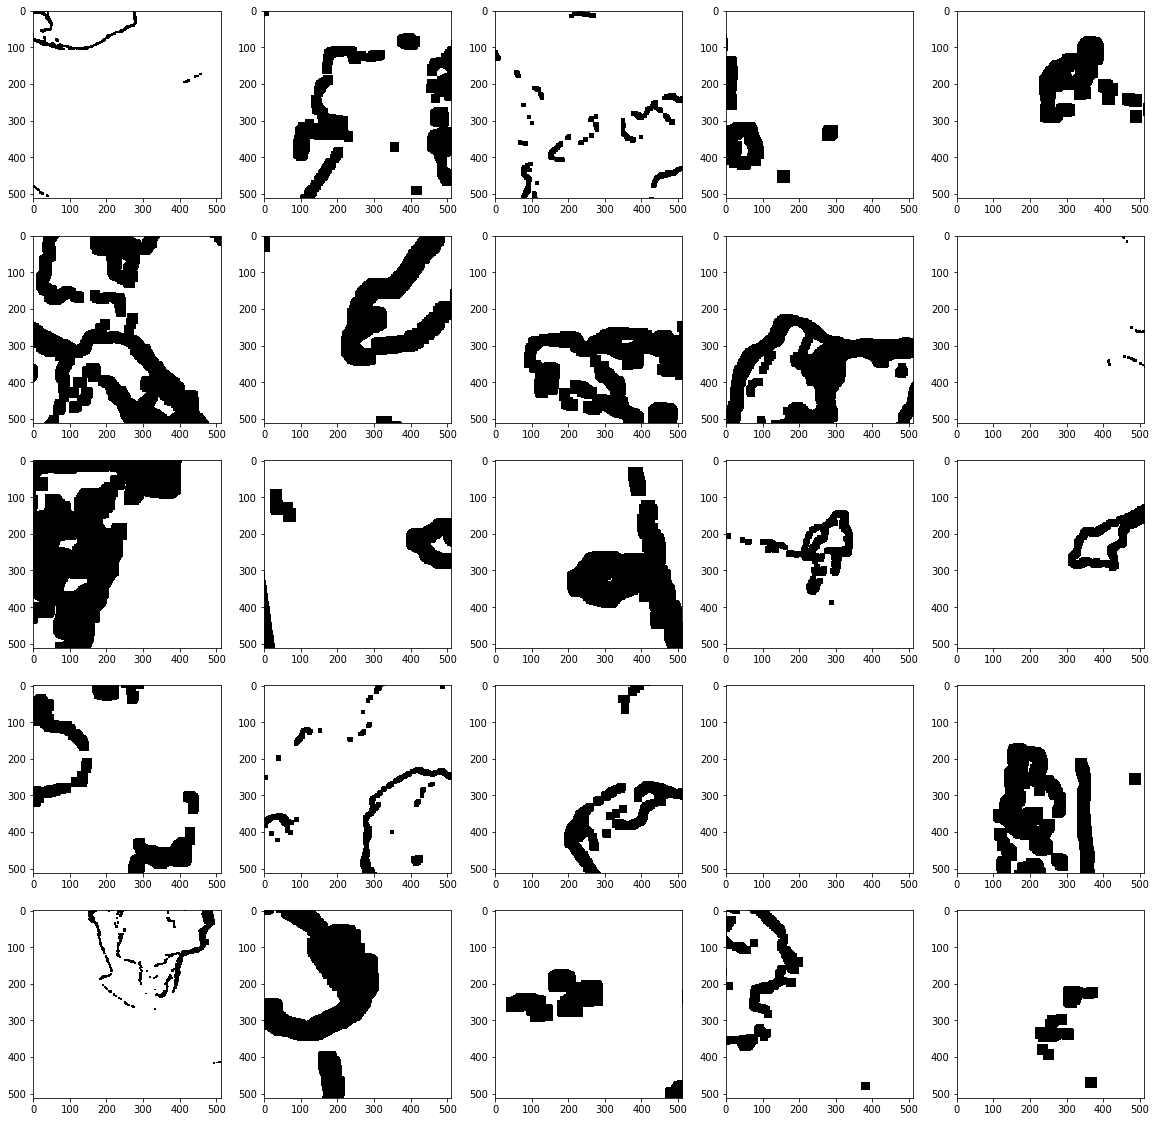

In [4]:
# Instantiate mask generator
mask_generator = MaskGenerator(512, 512, 3, rand_seed=42, filepath='./data/masks/train')

# Plot the results
_, axes = plt.subplots(5, 5, figsize=(20, 20))
axes = list(itertools.chain.from_iterable(axes))

for i in range(len(axes)):
    
    # Generate image
    img = mask_generator.sample()
    
    # Plot image on axis
    axes[i].imshow(img*255)